# Uniform random number generator

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import time
import random as rd

In [5]:
def test_random_generator(samples):
    """
    
    """
    
    # get the baseline
    baseline = [rd.uniform(0, 1) for x in range(samples)]
    return baseline

test1 = test_random_generator(100)

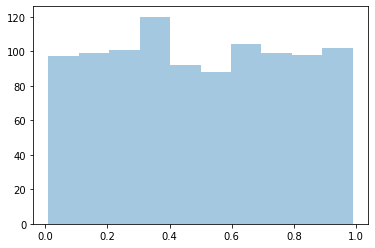

In [6]:
def uniform_gen_waiting_time_test(samples):
    """

    """
    result = []
    for x in range(samples):
        n = time.time()
        result.append(float(str(n)[-2:]) / 100)
        time.sleep(.0001)
    return result

dist_test = uniform_gen_waiting_time_test(1000)
sns.distplot(dist_test, bins=10, kde=False)

In [38]:
class PseudoRandomGen(object):
    """
    implements a lagged Fibonacci generator (LFG)
    """
    def __init__(self, seed, opp: str="+", j: int=3, k: int=7, m: int=10):
        # check for requirements of j and k
        assert 0 < j < k
        
        # check the requirements of the seed
        self.seed = str(seed)
        assert len(self.seed) >= k
        
        if opp == "+":
            self.opp = lambda x, y : x + y
        elif opp == "-":
            self.opp = lambda x, y : x - y
        elif opp == "*":
            self.opp = lambda x, y : x * y
        else:
            raise Exception('operation is not supported')
            
        self.seed = np.array(list(map(int, self.seed)))
        self.j = j
        self.k = k
        self.m = m
    
    def gen_random(self):
        """
        
        """
        new_int = self.opp(self.seed[self.j - 1], self.seed[self.k - 1]) % self.m
        self.seed = np.append(self.seed[1:], new_int)
        return new_int

In [43]:
rd_test = PseudoRandomGen(6421893)

for x in range(0, 5):
    print("{0} --> {1}".format(rd_test.seed, rd_test.gen_random()))

[6 4 2 1 8 9 3] --> 5
[4 2 1 8 9 3 5] --> 6
[2 1 8 9 3 5 6] --> 4
[1 8 9 3 5 6 4] --> 3
[8 9 3 5 6 4 3] --> 6


In [46]:
rd_test = PseudoRandomGen(6421893, m=101)

for x in range(0, 20):
    print("{0} --> {1}".format(rd_test.seed, rd_test.gen_random()))

[6 4 2 1 8 9 3] --> 5
[4 2 1 8 9 3 5] --> 6
[2 1 8 9 3 5 6] --> 14
[ 1  8  9  3  5  6 14] --> 23
[ 8  9  3  5  6 14 23] --> 26
[ 9  3  5  6 14 23 26] --> 31
[ 3  5  6 14 23 26 31] --> 37
[ 5  6 14 23 26 31 37] --> 51
[ 6 14 23 26 31 37 51] --> 74
[14 23 26 31 37 51 74] --> 100
[ 23  26  31  37  51  74 100] --> 30
[ 26  31  37  51  74 100  30] --> 67
[ 31  37  51  74 100  30  67] --> 17
[ 37  51  74 100  30  67  17] --> 91
[ 51  74 100  30  67  17  91] --> 90
[ 74 100  30  67  17  91  90] --> 19
[100  30  67  17  91  90  19] --> 86
[30 67 17 91 90 19 86] --> 2
[67 17 91 90 19 86  2] --> 93
[17 91 90 19 86  2 93] --> 82
